<a href="https://colab.research.google.com/github/Yeen000/Aiffel/blob/master/4_modelingipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 환경세팅/ 피쳐셀렉션

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 60.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import koreanize_matplotlib

plt.rc('font', family='NanumBarunGothic')

In [4]:
!pip install koreanize-matplotlib

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import koreanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [5]:
users_f = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IM/users_f.csv")

In [6]:
users_f

,user_id,total_reorder_count,avg_cart_order_cnt,avg_reorder_cnt,avg_reorder_price,avg_days_since_prior_order,frequency,monetary,reorder_ratio,max_min_price,max_min_price_log,recency,is_churn,LTV
0,1,10,6.363636,4.636364,38.622727,17.272727,11,16.638182,0.728571,74.87,4.329021,14.0,0,1319.599181
1,2,13,15.066667,7.000000,92.113333,15.200000,15,40.797333,0.464602,330.77,5.804442,30.0,0,4412.121386
2,3,11,7.333333,4.583333,69.029167,11.083333,12,39.950833,0.625000,144.32,4.978938,15.0,0,3456.161752
3,4,1,3.600000,0.200000,3.518000,11.000000,5,75.114000,0.055556,169.76,5.140259,0.0,0,2707.470893
4,5,4,9.200000,3.600000,54.768000,9.200000,5,31.908000,0.391304,74.13,4.319220,6.0,0,1150.251580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,206205,3,12.750000,3.500000,59.250000,12.500000,4,60.330000,0.274510,218.15,5.389756,10.0,0,1739.760021
206205,206206,63,4.253731,2.014925,22.413582,3.716418,67,23.968209,0.473684,183.49,5.217595,11.0,1,11578.141870
206206,206207,15,13.937500,8.187500,79.393125,13.437500,16,35.010000,0.587444,203.38,5.319981,18.0,0,4038.388751
206207,206208,48,13.816327,9.775510,124.762449,7.285714,49,35.420204,0.707533,356.53,5.879219,7.0,0,12512.401364


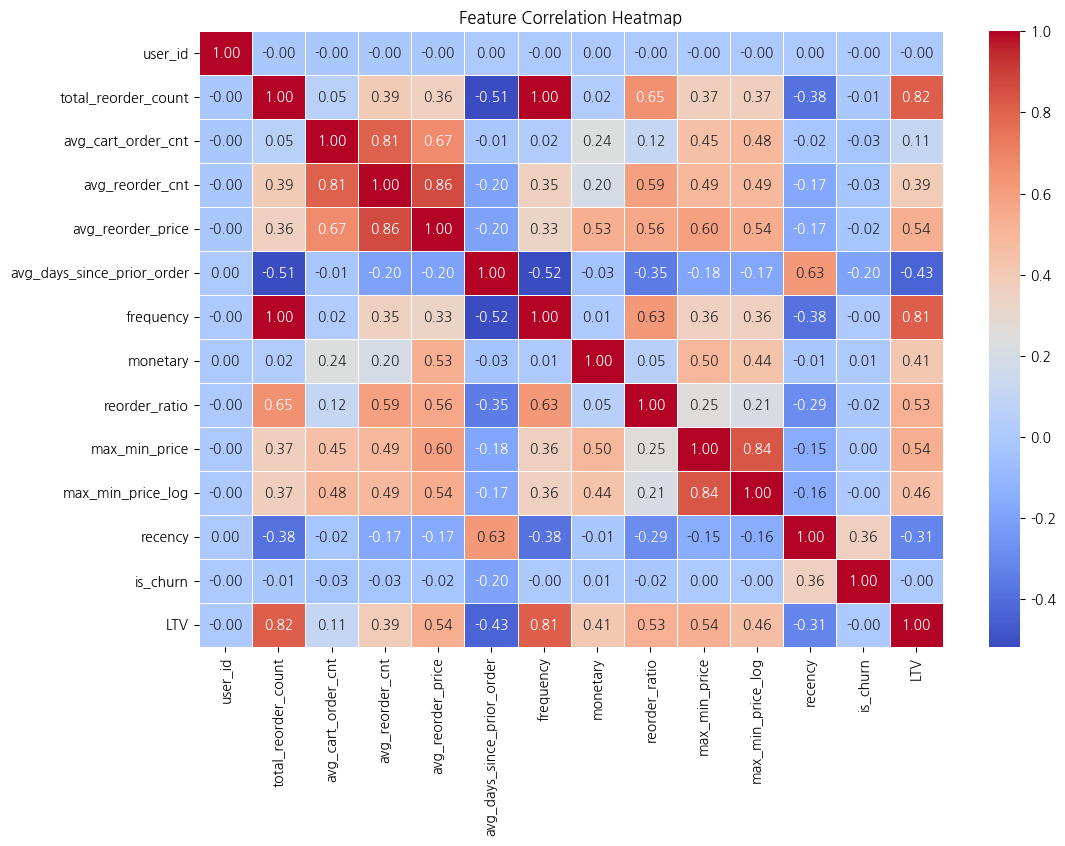

In [7]:
#전체 변수의 상관관계 분석

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 숫자형 변수만 선택
numeric_cols = users_f.select_dtypes(include=['float64', 'int64']).columns

# 상관 행렬 계산
corr_matrix = users_f[numeric_cols].corr()

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

변수선택 기준
1. 전체변수에서 거의 같은 기준으로 만들어진거 제외
2. 상관관계 높은 것들중 하나 제외
3. 라소, 릿지 , Elasticnet, Mutual Information 실행해서 적정한 갯수 (3~5개) 선택

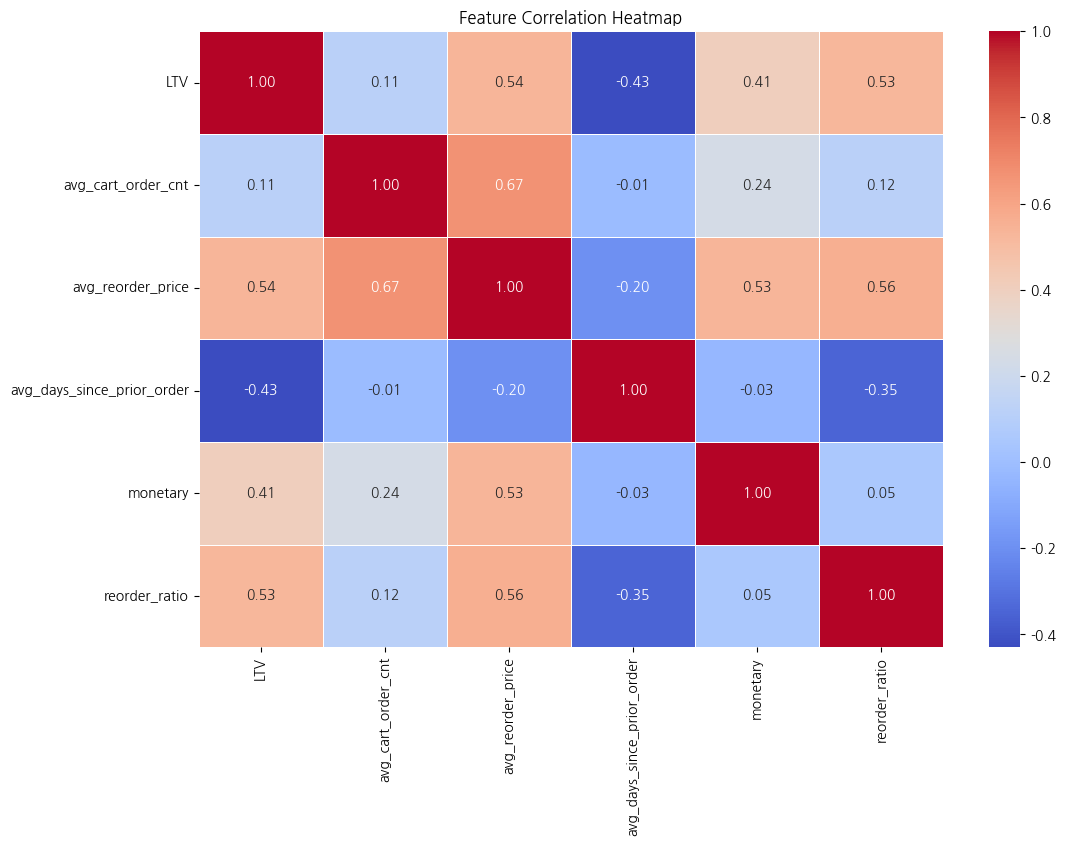

In [8]:
# 최종 선택 변수의 상관관계 분석

selected_features = ["LTV",
     "avg_cart_order_cnt", "avg_reorder_price",
    "avg_days_since_prior_order", "monetary", "reorder_ratio"
]

# 상관 행렬 계산
corr_matrix = users_f[selected_features].corr()

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from yellowbrick.cluster import KElbowVisualizer

# Feature Selection 대상 변수
selected_features = ["LTV",
     "avg_cart_order_cnt", "avg_reorder_price",
    "avg_days_since_prior_order", "monetary", "reorder_ratio"
]

# Feature & Target 분리
X = users_f[selected_features]
y = users_f["LTV"]

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lasso 회귀를 사용하여 중요 Feature 선택
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)
important_features = np.array(selected_features)[lasso.coef_ != 0]

print("선택된 주요 변수:", important_features)

선택된 주요 변수: ['LTV']


In [10]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(cv=5).fit(X_scaled, y)
print("Ridge 가중치:", ridge.coef_)

Ridge 가중치: [ 5.25854210e+03 -1.12307057e-03  1.85463557e-03 -1.39473234e-03
  1.29030507e-03  1.31633247e-03]


In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_df = pd.DataFrame(X_scaled, columns=selected_features)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

print(vif_data)

                      Feature       VIF
0                         LTV  2.054805
1          avg_cart_order_cnt  2.759073
2           avg_reorder_price  6.069435
3  avg_days_since_prior_order  1.286619
4                    monetary  2.052860
5               reorder_ratio  2.611982


In [12]:
lasso = LassoCV(cv=5, alphas=np.logspace(-4,1,100), random_state=42).fit(X_scaled, y)
selected_features_lasso = np.array(selected_features)[lasso.coef_ != 0]
print("Lasso 선택된 주요 변수:", selected_features_lasso)

Lasso 선택된 주요 변수: ['LTV']


In [13]:
from sklearn.linear_model import ElasticNetCV

elastic = ElasticNetCV(cv=5, l1_ratio=0.5, random_state=42).fit(X_scaled, y)
selected_features_elastic = np.array(selected_features)[elastic.coef_ != 0]
print("ElasticNet 선택된 주요 변수:", selected_features_elastic)

ElasticNet 선택된 주요 변수: ['LTV' 'avg_cart_order_cnt' 'avg_reorder_price'
 'avg_days_since_prior_order' 'monetary' 'reorder_ratio']


In [14]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(X_scaled, y)
selected_features_mi = np.array(selected_features)[mi_scores > np.median(mi_scores)]
print("Mutual Information 선택된 주요 변수:", selected_features_mi)

Mutual Information 선택된 주요 변수: ['LTV' 'monetary' 'reorder_ratio']


## K-means

Mutual Information 선택된 주요 변수: ['LTV' 'monetary' 'reorder_ratio']
-> 최종 피쳐로 선택

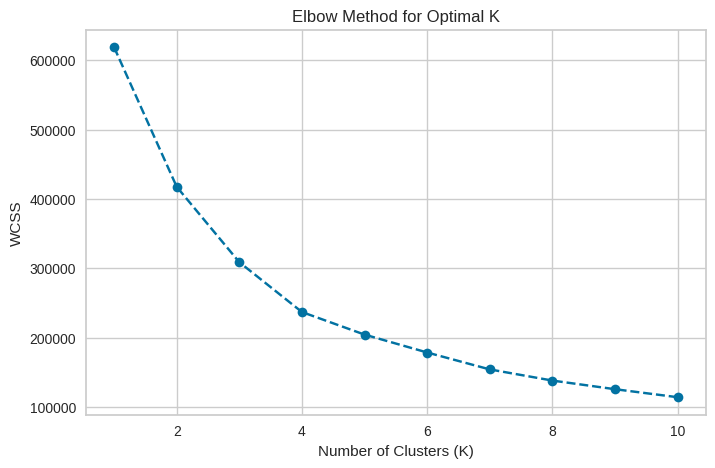

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# 선택된 변수만 사용
selected_features_mi = ["LTV", "monetary", "reorder_ratio"]
X_selected = users_f[selected_features_mi]  # 원본 데이터에서 선택된 변수만 사용

# 데이터 스케일링 (K-Means는 스케일링 필수)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# 최적의 K 찾기 (Elbow Method)
wcss = []
K_range = range(1, 11)  # 1~10개의 클러스터 시도

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # 관성(WCSS, Within-Cluster Sum of Squares) 저장

# Elbow Method 시각화
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

In [16]:
import numpy as np

# WCSS 변화량 계산 (기울기 차이)
wcss_diff = np.diff(wcss)
wcss_diff_ratio = wcss_diff[:-1] / wcss_diff[1:]  # 변화율 계산

# 기울기 변화율 출력
for k, change in zip(range(2, len(wcss_diff_ratio) + 2), wcss_diff_ratio):
    print(f"K={k}, 기울기 변화율: {change:.2f}")

K=2, 기울기 변화율: 1.85
K=3, 기울기 변화율: 1.51
K=4, 기울기 변화율: 2.21
K=5, 기울기 변화율: 1.26
K=6, 기울기 변화율: 1.06
K=7, 기울기 변화율: 1.52
K=8, 기울기 변화율: 1.29
K=9, 기울기 변화율: 1.08


                  LTV    monetary  reorder_ratio
Cluster                                         
0         3804.513481   33.374340       0.567683
1        16187.316385  153.103148       0.399391
2        14329.310681   41.536842       0.728308
3         1591.915256   31.493500       0.256781


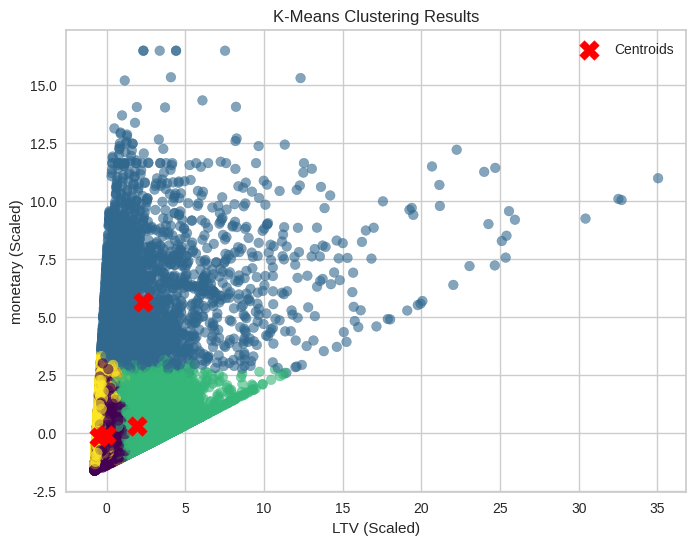

In [17]:
# 최적 K값 설정 (Elbow Method 결과 기반으로)
optimal_k = 4

# K-Means 모델 학습
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)  # 클러스터 할당

# 결과 데이터프레임 생성
df_clusters = users_f[['user_id']].copy() # 추가코드
# df_clusters = pd.DataFrame(X_selected)  # 원본 스케일 데이터 사용
df_clusters = df_clusters.assign(LTV=X_selected['LTV'],
                                 monetary=X_selected['monetary'],
                                 reorder_ratio=X_selected['reorder_ratio'],
                                 Cluster=clusters)  # 원본 변수와 클러스터 추가
df_clusters["Cluster"] = clusters  # 클러스터 추가

# # 클러스터별 평균값 확인
# print(df_clusters.groupby("Cluster").mean())

# 클러스터별 평균값 확인 (user_id 제외)
df_cluster_summary = users_f[selected_features_mi].copy()
df_cluster_summary["Cluster"] = clusters
print(df_cluster_summary.groupby("Cluster").mean())

# 클러스터링 결과 시각화 (2D)
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel("LTV (Scaled)")
plt.ylabel("monetary (Scaled)")
plt.title("K-Means Clustering Results")
plt.legend()
plt.show()

In [18]:
# 클러스터별 개수 및 비율 계산
cluster_counts = df_clusters["Cluster"].value_counts()
total_count = len(df_clusters)

# 비율 계산
cluster_ratios = cluster_counts / total_count * 100  # 퍼센트 비율 계산

# 결과 데이터프레임 생성
df_cluster_summary = pd.DataFrame({
    "Cluster": cluster_counts.index,
    "Count": cluster_counts.values,
    "Ratio (%)": cluster_ratios.values
})

# 데이터프레임 정렬
df_cluster_summary = df_cluster_summary.sort_values(by="Cluster").reset_index(drop=True)

# 결과 출력
print(df_cluster_summary)

   Cluster  Count  Ratio (%)
0        0  89114  43.215379
1        1   3233   1.567827
2        2  22285  10.806997
3        3  91577  44.409798


In [19]:
import numpy as np
from sklearn.metrics import silhouette_score

# 10,000개 이하 샘플로 제한
num_samples = min(10000, X_scaled.shape[0])  # 10,000개까지만 사용
sample_indices = np.random.choice(X_scaled.shape[0], num_samples, replace=False)
X_sample = X_scaled[sample_indices]
clusters_sample = np.array(clusters)[sample_indices]

# 샘플링된 데이터로 Silhouette Score 계산
silhouette_avg = silhouette_score(X_sample, clusters_sample)
print(f"Silhouette Score (샘플링 적용): {silhouette_avg:.4f}")

Silhouette Score (샘플링 적용): 0.3610


In [20]:
 import numpy as np
from sklearn.metrics import silhouette_score

num_repeats = 5  # 5번 반복
num_samples = min(10000, X_scaled.shape[0])  # 샘플 개수 제한

silhouette_scores = []

for _ in range(num_repeats):
    sample_indices = np.random.choice(X_scaled.shape[0], num_samples, replace=False)
    X_sample = X_scaled[sample_indices]
    clusters_sample = np.array(clusters)[sample_indices]

    score = silhouette_score(X_sample, clusters_sample)
    silhouette_scores.append(score)

# 평균값 출력
silhouette_mean = np.mean(silhouette_scores)
silhouette_std = np.std(silhouette_scores)

print(f"Silhouette Score (반복 샘플링 평균): {silhouette_mean:.4f} ± {silhouette_std:.4f}")

Silhouette Score (반복 샘플링 평균): 0.3614 ± 0.0032


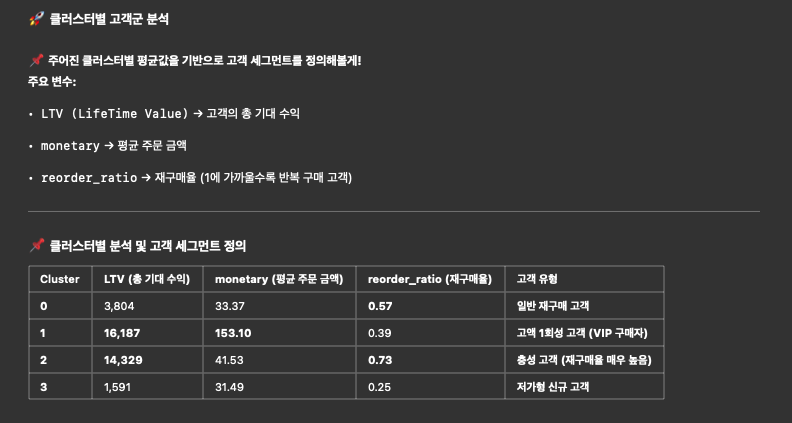

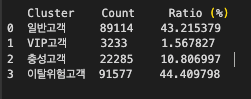

🔥 결론  
	•	**Cluster 2 (충성 고객)**이 가장 중요한 고객 → VIP 혜택 제공 & 유지 전략 필요  
	•	Cluster 1 (고액 1회성 고객) → 재구매 유도 전략이 필요 (프리미엄 혜택 제공)  
	•	Cluster 3 (저가형 신규 고객) → 첫 구매 후 이탈 방지 전략 (쿠폰, 개인화 마케팅)  
	•	Cluster 0 (일반 재구매 고객) → 구독형 서비스 유도 가능 (리텐션 마케팅 강화)


In [21]:
df_clusters

,user_id,LTV,monetary,reorder_ratio,Cluster
0,1,1319.599181,16.638182,0.728571,0
1,2,4412.121386,40.797333,0.464602,0
2,3,3456.161752,39.950833,0.625000,0
3,4,2707.470893,75.114000,0.055556,3
4,5,1150.251580,31.908000,0.391304,3
...,...,...,...,...,...
206204,206205,1739.760021,60.330000,0.274510,3
206205,206206,11578.141870,23.968209,0.473684,2
206206,206207,4038.388751,35.010000,0.587444,0
206207,206208,12512.401364,35.420204,0.707533,2


In [22]:
cluster_id = df_clusters.drop(['LTV',	'monetary',	'reorder_ratio'],axis=1)
cluster_id

,user_id,Cluster
0,1,0
1,2,0
2,3,0
3,4,3
4,5,3
...,...,...
206204,206205,3
206205,206206,2
206206,206207,0
206207,206208,2


In [23]:
# 원본 데이터 `users_f`와 `df_clusters`를 `user_id` 기준으로 병합
c_users = users_f.merge(cluster_id, on='user_id', how='left')
c_users.head()

,user_id,total_reorder_count,avg_cart_order_cnt,avg_reorder_cnt,avg_reorder_price,avg_days_since_prior_order,frequency,monetary,reorder_ratio,max_min_price,max_min_price_log,recency,is_churn,LTV,Cluster
0,1,10,6.363636,4.636364,38.622727,17.272727,11,16.638182,0.728571,74.87,4.329021,14.0,0,1319.599181,0
1,2,13,15.066667,7.000000,92.113333,15.200000,15,40.797333,0.464602,330.77,5.804442,30.0,0,4412.121386,0
2,3,11,7.333333,4.583333,69.029167,11.083333,12,39.950833,0.625000,144.32,4.978938,15.0,0,3456.161752,0
3,4,1,3.600000,0.200000,3.518000,11.000000,5,75.114000,0.055556,169.76,5.140259,0.0,0,2707.470893,3
4,5,4,9.200000,3.600000,54.768000,9.200000,5,31.908000,0.391304,74.13,4.319220,6.0,0,1150.251580,3


In [24]:
# 클러스터별 개수 계산
cluster_counts = c_users['Cluster'].value_counts()

# 전체 데이터 개수
total_count = len(c_users)

# 클러스터별 비율 계산
cluster_ratios = cluster_counts / total_count

# 결과 출력
print(cluster_ratios)

Cluster
3    0.444098
0    0.432154
2    0.108070
1    0.015678
Name: count, dtype: float64


## DBSCAN (실행 주의)

In [ ]:
# 선택된 변수만 사용
selected_features_mi = ["LTV", "monetary", "reorder_ratio"]
X_selected = users_f[selected_features_mi]  # 원본 데이터에서 선택된 변수만 사용

In [ ]:
# # 분포 차이를 줄이고 데이터 밀집을 분산시키기 위해 log 사용
# import numpy as np
# X_selected["LTV_log"] = np.log1p(X_selected["LTV"])  # log(1 + x) 변환
# X_selected["monetary_log"] = np.log1p(X_selected["monetary"])


In [ ]:
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_scaled_minmax = scaler.fit_transform(X_selected)

1. 기본

Cluster
-1    159896
 0     46068
 1       145
 2       100
Name: count, dtype: int64


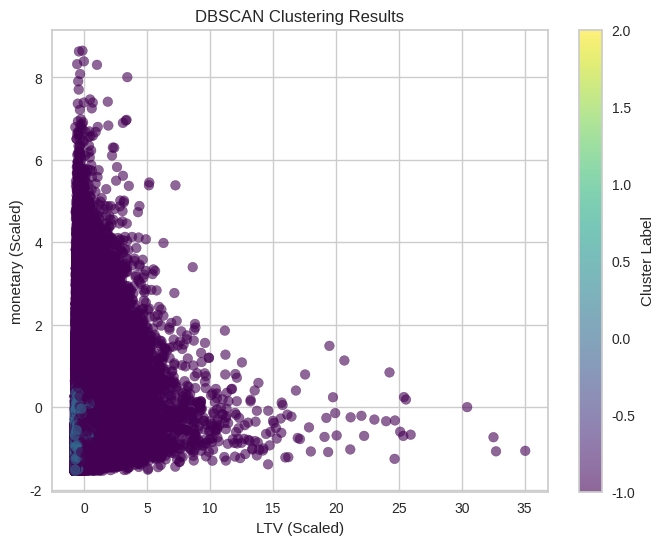

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# DBSCAN 실행 (기본 파라미터)
dbscan = DBSCAN(eps=0.3, min_samples=100)  # eps와 min_samples는 이후 튜닝 가능
clusters = dbscan.fit_predict(X_scaled)

# 클러스터링 결과 저장
df_clusters_dbscan = pd.DataFrame(X_selected)
df_clusters_dbscan["Cluster"] = clusters

# 클러스터별 데이터 수 확인
print(df_clusters_dbscan["Cluster"].value_counts())

# 시각화 (2D)
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel("LTV (Scaled)")
plt.ylabel("monetary (Scaled)")
plt.title("DBSCAN Clustering Results")
plt.colorbar(label="Cluster Label")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np

# 샘플링 비율 설정 (예: 10% 샘플링)
sample_ratio = 0.1
n_samples = int(len(X_scaled) * sample_ratio)

# 클러스터가 할당된 데이터만 필터링 (노이즈 포인트 제외)
mask = clusters != -1
X_filtered = X_scaled[mask]
clusters_filtered = clusters[mask]

# 데이터 샘플링 (랜덤 샘플링)
if len(X_filtered) > n_samples:
    sample_indices = np.random.choice(len(X_filtered), n_samples, replace=False)
    X_sampled = X_filtered[sample_indices]
    clusters_sampled = clusters_filtered[sample_indices]
else:
    X_sampled = X_filtered
    clusters_sampled = clusters_filtered

# 실루엣 계수 계산
if len(set(clusters_sampled)) > 1:  # 클러스터가 2개 이상이어야 계산 가능
    silhouette_avg = silhouette_score(X_sampled, clusters_sampled)
    print(f"샘플링된 DBSCAN 실루엣 계수: {silhouette_avg:.4f}")
else:
    print("유효한 클러스터가 부족하여 실루엣 계수를 계산할 수 없습니다.")

샘플링된 DBSCAN 실루엣 계수: 0.3613


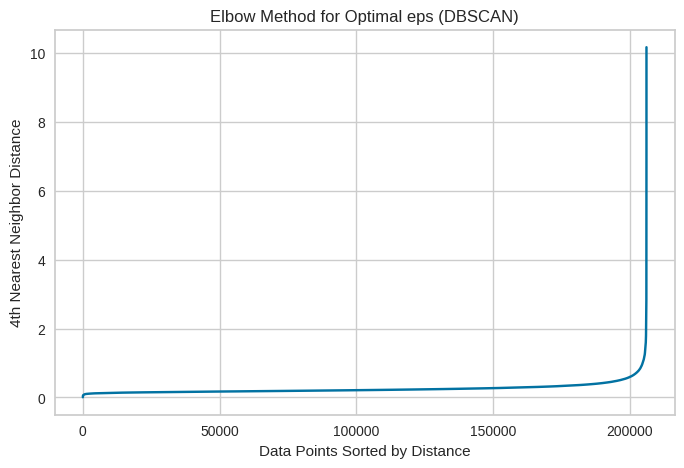

In [ ]:
from sklearn.neighbors import NearestNeighbors

# 4번째 이웃(k=4) 거리 계산 (min_samples=5라면 k=4가 적절함)
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# 거리 정렬 후 플롯
distances = np.sort(distances[:, 3])  # 4번째 이웃 거리 정렬
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.xlabel("Data Points Sorted by Distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.title("Elbow Method for Optimal eps (DBSCAN)")
plt.show()

DBSCAN 잘 안되는 원인 -> 밀도 분포 때문에

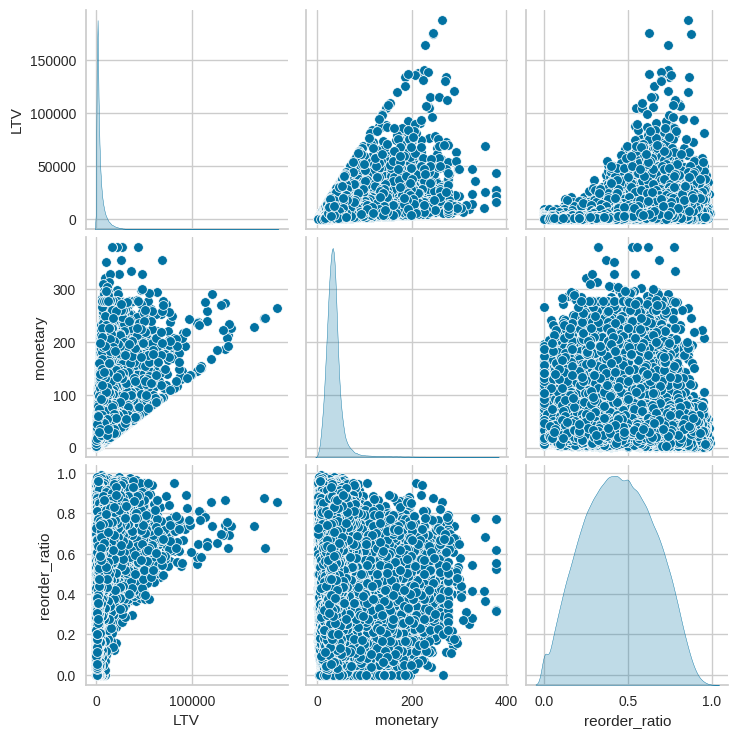

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(pd.DataFrame(X_selected, columns=selected_features_mi), diag_kind='kde')
plt.show()

🚀 결론: K-Means가 더 적절한 이유

✅ LTV, monetary가 특정 구간에 몰려 있고 일부 극단값이 있음.  
✅ DBSCAN은 밀도 차이를 기반으로 클러스터를 찾는데, 현재 데이터는 밀도가 균일해서
  DBSCAN이 적절하지 않을 가능성이 높음.  
✅ K-Means는 거리 기반 클러스터링이라, 이런 분포에서도 정상적으로 작동할 가능성이 큼.  

## 사후분석

주의! DBSCA클러스터링한거 말고 k-means 클러스터링 결과로 분석해야함   
DBSCAN 파트 실행하지 않기

In [25]:
c_users.head()

,user_id,total_reorder_count,avg_cart_order_cnt,avg_reorder_cnt,avg_reorder_price,avg_days_since_prior_order,frequency,monetary,reorder_ratio,max_min_price,max_min_price_log,recency,is_churn,LTV,Cluster
0,1,10,6.363636,4.636364,38.622727,17.272727,11,16.638182,0.728571,74.87,4.329021,14.0,0,1319.599181,0
1,2,13,15.066667,7.000000,92.113333,15.200000,15,40.797333,0.464602,330.77,5.804442,30.0,0,4412.121386,0
2,3,11,7.333333,4.583333,69.029167,11.083333,12,39.950833,0.625000,144.32,4.978938,15.0,0,3456.161752,0
3,4,1,3.600000,0.200000,3.518000,11.000000,5,75.114000,0.055556,169.76,5.140259,0.0,0,2707.470893,3
4,5,4,9.200000,3.600000,54.768000,9.200000,5,31.908000,0.391304,74.13,4.319220,6.0,0,1150.251580,3


#### USER 테이블 컬럼 해석
user_id	: 사용자 ID  
total_reorder_count	: 총 재구매 발생 횟수  
avg_cart_order_cnt	: 평균 장바구니 크기 (품목 수)  
avg_reorder_cnt	: 평균 재구매 품목 수  
avg_reorder_price	: 평균 재구매 가격  
avg_days_since_prior_order :	평균 재구매 주기 (이전 주문 후 평균 경과 일수)  
recency	: 가장 최근 구매 이후 지난 일수  
frequency	: 총 주문 횟수    
monetary	: 평균 구매 가격 (거래 금액)  
reorder_ratio : 재주문비율  
max_min_price : 최대 - 최소금액  
recency : 최근성  
is_churn : 이탈여부  
LTV: 고객별 총구매력


In [26]:
cluster_ratios = c_users["Cluster"].value_counts(normalize=True) * 100
cluster_ratios

,proportion
Cluster,
3,44.409798
0,43.215379
2,10.806997
1,1.567827


In [29]:
# is_reorder 컬럼 매핑
reorder_mapping = {
    0: '유지',
    1: '이탈'
}
c_users['is_churn'] = c_users['is_churn'].map(reorder_mapping)

# Cluster 컬럼 매핑
cluster_mapping = {
    0: '일반고객',
    1: 'VIP',
    2: '충성고객',
    3: '이탈위험고객'
}
c_users['cluster'] = c_users['Cluster'].map(cluster_mapping)

# 불필요한 원본 컬럼 삭제 (선택 사항)
c_users.drop(columns=['Cluster'], inplace=True)
c_users.head()


,user_id,total_reorder_count,avg_cart_order_cnt,avg_reorder_cnt,avg_reorder_price,avg_days_since_prior_order,frequency,monetary,reorder_ratio,max_min_price,max_min_price_log,recency,is_churn,LTV,cluster
0,1,10,6.363636,4.636364,38.622727,17.272727,11,16.638182,0.728571,74.87,4.329021,14.0,유지,1319.599181,일반고객
1,2,13,15.066667,7.000000,92.113333,15.200000,15,40.797333,0.464602,330.77,5.804442,30.0,유지,4412.121386,일반고객
2,3,11,7.333333,4.583333,69.029167,11.083333,12,39.950833,0.625000,144.32,4.978938,15.0,유지,3456.161752,일반고객
3,4,1,3.600000,0.200000,3.518000,11.000000,5,75.114000,0.055556,169.76,5.140259,0.0,유지,2707.470893,이탈위험고객
4,5,4,9.200000,3.600000,54.768000,9.200000,5,31.908000,0.391304,74.13,4.319220,6.0,유지,1150.251580,이탈위험고객


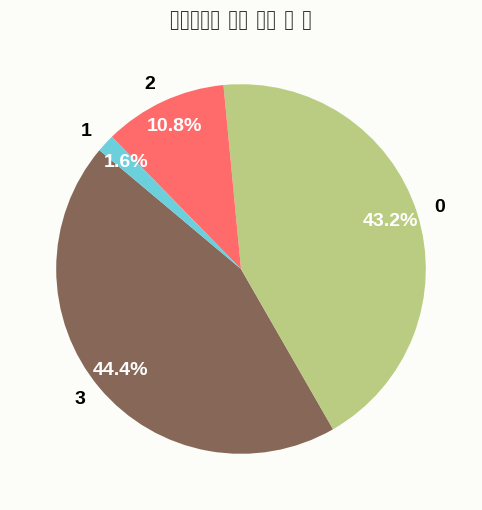

In [30]:
# 클러스터별 고객 수와 비율
import pandas as pd
import matplotlib.pyplot as plt

# 색상 지정
colors = ["#876858", "#bacc81", "#ff6b6b", "#6bcfdc", "#c2c2f0", "#ffb3e6"]

# 그래프 설정
fig, ax = plt.subplots(figsize=(8, 6))  # 원을 작게 하기 위해 높이를 줄임
fig.patch.set_facecolor("#fcfdf8")  # 전체 배경색
ax.set_facecolor("#fcfdf8")  # 플롯 영역 배경색

# 원형 그래프 생성
wedges, texts, autotexts = ax.pie(
    cluster_counts,
    labels=cluster_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    textprops={'fontsize': 14},  # 라벨 크기 증가
    pctdistance=0.85  # 퍼센트 텍스트를 원 안쪽으로 이동
)

# 제목 스타일 변경
plt.title("클러스터별 고객 비율 및 수", fontsize=20, fontweight="bold")

# 라벨과 퍼센트 텍스트 스타일 변경
for text in texts:
    text.set(fontsize=14, color="black", fontweight="semibold")

for autotext in autotexts:
    autotext.set(fontsize=14, fontweight="bold", color="white")

# 그래프 표시
plt.show()

In [31]:
f_orders = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IM/f_orders.csv")
f_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,cart_order_cnt,reorder_cnt,total_price,max_price,total_reordered_price,is_reorder
0,2539329,1,prior,1,2,8,0.0,5,0,12.06,42.11,0.00,0
1,2398795,1,prior,2,3,7,15.0,6,3,35.37,75.12,32.72,1
2,473747,1,prior,3,3,12,21.0,5,3,12.06,39.80,23.54,1
3,2254736,1,prior,4,4,7,29.0,5,5,12.06,36.71,36.71,1
4,431534,1,prior,5,4,15,28.0,8,5,35.37,106.09,66.59,1


In [32]:
cluster_id

,user_id,Cluster
0,1,0
1,2,0
2,3,0
3,4,3
4,5,3
...,...,...
206204,206205,3
206205,206206,2
206206,206207,0
206207,206208,2


product 정보테이블과 결합

In [33]:
# 원본 데이터 `users_f`와 `df_clusters`를 `user_id` 기준으로 병합
c_orders = f_orders.merge(cluster_id, on='user_id', how='left')
c_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,cart_order_cnt,reorder_cnt,total_price,max_price,total_reordered_price,is_reorder,Cluster
0,2539329,1,prior,1,2,8,0.0,5,0,12.06,42.11,0.00,0,0
1,2398795,1,prior,2,3,7,15.0,6,3,35.37,75.12,32.72,1,0
2,473747,1,prior,3,3,12,21.0,5,3,12.06,39.80,23.54,1,0
3,2254736,1,prior,4,4,7,29.0,5,5,12.06,36.71,36.71,1,0
4,431534,1,prior,5,4,15,28.0,8,5,35.37,106.09,66.59,1,0


In [34]:
# user_id가 같은 경우 cluster 값도 같은지 확인
c_orders.groupby('user_id')['Cluster'].nunique().value_counts()

,count
Cluster,
1,206209


사후분석

In [35]:

import pandas as pd

# 클러스터별 평균 장바구니 크기 (cart_order_cnt 평균)
avg_cart_size = c_orders.groupby("Cluster")["cart_order_cnt"].mean().reset_index()
avg_cart_size.rename(columns={"cart_order_cnt": "avg_cart_size"}, inplace=True)

# 클러스터별 가장 많이 구매하는 요일
most_common_dow = c_orders.groupby("Cluster")["order_dow"].agg(lambda x: x.mode()[0]).reset_index()
most_common_dow.rename(columns={"order_dow": "most_common_order_dow"}, inplace=True)

# 클러스터별 가장 많이 구매하는 시간대
most_common_hour = c_orders.groupby("Cluster")["order_hour_of_day"].agg(lambda x: x.mode()[0]).reset_index()
most_common_hour.rename(columns={"order_hour_of_day": "most_common_order_hour"}, inplace=True)

# 클러스터별 평균 지출 금액 (total_price 평균)
avg_spending = c_orders.groupby("Cluster")["total_price"].mean().reset_index()
avg_spending.rename(columns={"total_price": "avg_spending"}, inplace=True)

# 클러스터별 재구매 비율 (reorder_cnt / cart_order_cnt)
c_orders["reorder_rate"] = c_orders["reorder_cnt"] / c_orders["cart_order_cnt"].replace(0, 1)  # 0 방지
reorder_ratio = c_orders.groupby("Cluster")["reorder_rate"].mean().reset_index()
reorder_ratio.rename(columns={"reorder_rate": "avg_reorder_rate"}, inplace=True)

# 클러스터별 평균 재구매 주기 (days_since_prior_order 평균)
reorder_cycle = c_orders.groupby("Cluster")["days_since_prior_order"].mean().reset_index()
reorder_cycle.rename(columns={"days_since_prior_order": "avg_reorder_cycle"}, inplace=True)

# 결과 데이터프레임 합치기
Cluster_analysis = avg_cart_size.merge(most_common_dow, on="Cluster")\
                               .merge(most_common_hour, on="Cluster")\
                               .merge(avg_spending, on="Cluster")\
                               .merge(reorder_ratio, on="Cluster")\
                               .merge(reorder_cycle, on="Cluster")

# 결과 출력
print(Cluster_analysis)


   Cluster  avg_cart_size  most_common_order_dow  most_common_order_hour  \
0        0       9.818844                      0                      10   
1        1       9.121391                      5                      15   
2        2      11.191050                      1                      10   
3        3       8.955768                      0                      15   

   avg_spending  avg_reorder_rate  avg_reorder_cycle  
0     31.429493          0.613747          11.588750  
1    150.992714          0.544426           9.699393  
2     38.781414          0.747720           6.188465  
3     30.657331          0.311053          14.519928  


In [36]:
prod = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IM/products.csv")
prod.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [37]:
ais = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IM/aisles.csv")
ais.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [38]:
orders_products_f = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IM/orders_products_f.csv")

In [39]:
orders_products_f.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,price,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,4.42,yogurt,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,5.72,other creams cheeses,dairy eggs
2,1,10246,3,0,Organic Celery Hearts,83,4,2.84,fresh vegetables,produce
3,1,49683,4,0,Cucumber Kirby,83,4,1.55,fresh vegetables,produce
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,18.04,canned meat seafood,canned goods


In [40]:
c_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,cart_order_cnt,reorder_cnt,total_price,max_price,total_reordered_price,is_reorder,Cluster,reorder_rate
0,2539329,1,prior,1,2,8,0.0,5,0,12.06,42.11,0.00,0,0,0.000
1,2398795,1,prior,2,3,7,15.0,6,3,35.37,75.12,32.72,1,0,0.500
2,473747,1,prior,3,3,12,21.0,5,3,12.06,39.80,23.54,1,0,0.600
3,2254736,1,prior,4,4,7,29.0,5,5,12.06,36.71,36.71,1,0,1.000
4,431534,1,prior,5,4,15,28.0,8,5,35.37,106.09,66.59,1,0,0.625


In [41]:
a = c_orders[['order_id', 'user_id', 'Cluster']]

In [42]:
a.head()

,order_id,user_id,Cluster
0,2539329,1,0
1,2398795,1,0
2,473747,1,0
3,2254736,1,0
4,431534,1,0


In [43]:
c_pro_orders = a.merge(orders_products_f, on='order_id', how='left')
c_pro_orders.head()

,order_id,user_id,Cluster,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,price,aisle,department
0,2539329,1,0,196,1,0,Soda,77,7,9.15,soft drinks,beverages
1,2539329,1,0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,3.90,soy lactosefree,dairy eggs
2,2539329,1,0,12427,3,0,Original Beef Jerky,23,19,12.06,popcorn jerky,snacks
3,2539329,1,0,26088,4,0,Aged White Cheddar Popcorn,23,19,11.51,popcorn jerky,snacks
4,2539329,1,0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,5.49,paper goods,household


In [44]:
import pandas as pd

# 데이터 로드 (예제에서는 이미 DataFrame으로 존재한다고 가정)
# c_pro_orders = pd.read_csv('c_pro_orders.csv')  # 실제 파일이 있다면 사용

# 클러스터별 aisle 구매 수 집계
cluster_aisle_counts = c_pro_orders.groupby(['Cluster', 'aisle'])['order_id'].count().reset_index()
cluster_aisle_counts = cluster_aisle_counts.rename(columns={'order_id': 'aisle_count'})

# 클러스터별 department 구매 수 집계
cluster_department_counts = c_pro_orders.groupby(['Cluster', 'department'])['order_id'].count().reset_index()
cluster_department_counts = cluster_department_counts.rename(columns={'order_id': 'department_count'})

# 클러스터별 가장 많이 구매한 aisle 찾기
top_aisles = cluster_aisle_counts.loc[cluster_aisle_counts.groupby('Cluster')['aisle_count'].idxmax()]

# 클러스터별 가장 많이 구매한 department 찾기
top_departments = cluster_department_counts.loc[cluster_department_counts.groupby('Cluster')['department_count'].idxmax()]

# 결과 출력
print("Top Aisles by Cluster:")
print(top_aisles)

print("\nTop Departments by Cluster:")
print(top_departments)


Top Aisles by Cluster:
     Cluster             aisle  aisle_count
50         0      fresh fruits      1536073
187        1  fresh vegetables        26215
318        2      fresh fruits      1713548
455        3  fresh vegetables       629830

Top Departments by Cluster:
    Cluster department  department_count
19        0    produce           4099339
21        1    alcohol             73522
61        2    produce           4163395
82        3    produce           1556787


Top 5 Aisles by Cluster:
    Cluster                       aisle  aisle_count
0         0                fresh fruits      1536073
1         0            fresh vegetables      1514817
2         0  packaged vegetables fruits       782245
3         0                      yogurt       665006
4         0             packaged cheese       441423
5         1            fresh vegetables        26215
6         1                fresh fruits        22573
7         1                   red wines        20848
8         1                     spirits        19697
9         1  packaged vegetables fruits        14864
10        2                fresh fruits      1713548
11        2            fresh vegetables      1397768
12        2  packaged vegetables fruits       753711
13        2                      yogurt       619609
14        2                        milk       392042
15        3            fresh vegetables       629830
16        3                fresh fruits       520467
17        3  packaged

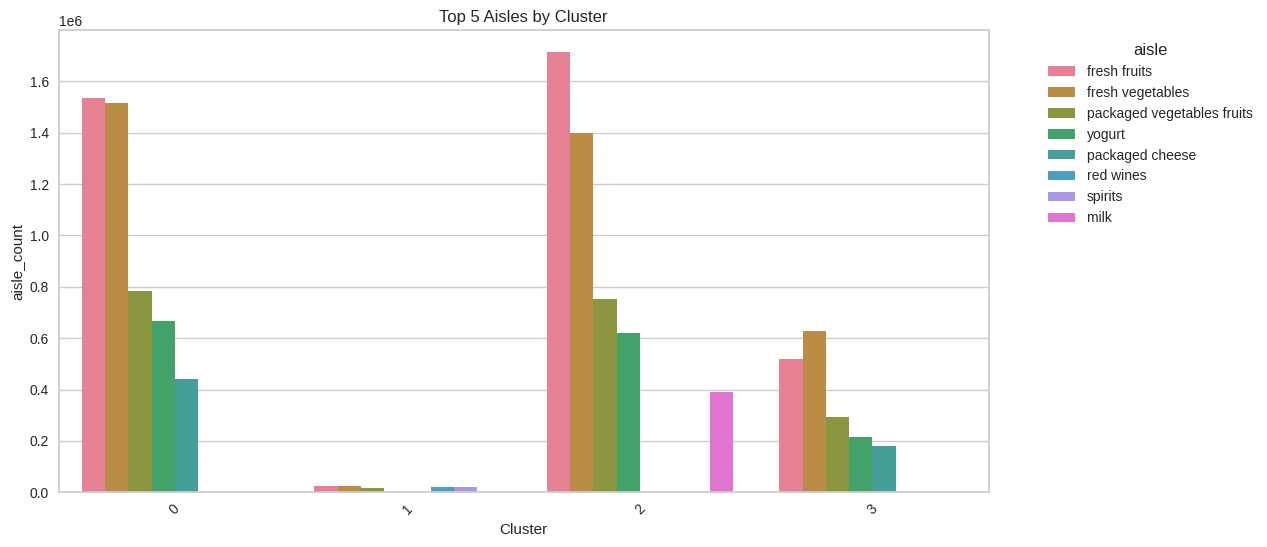

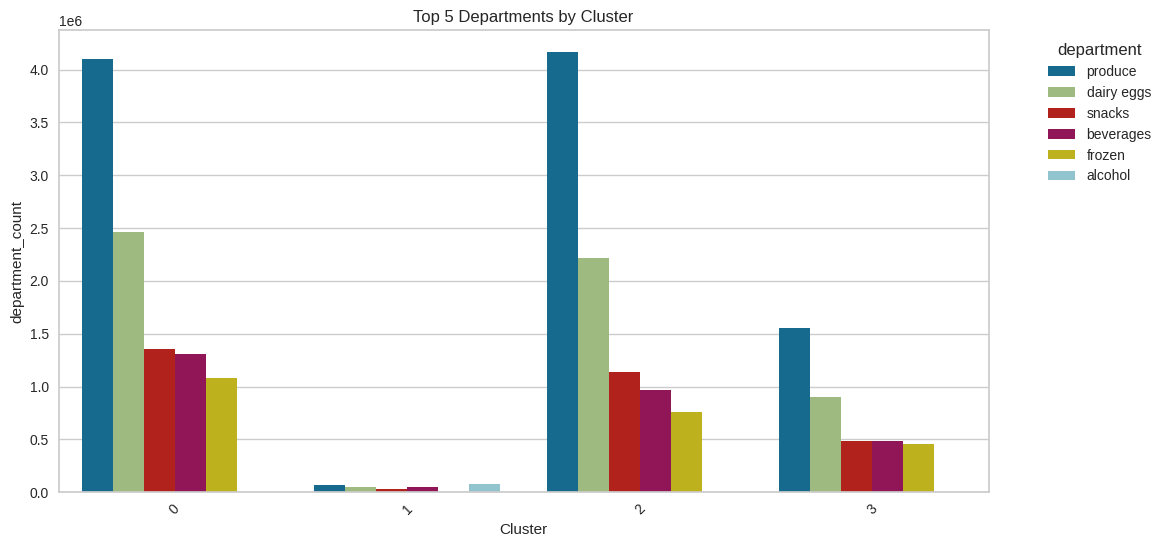

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 (예제에서는 이미 DataFrame으로 존재한다고 가정)
# c_pro_orders = pd.read_csv('c_pro_orders.csv')  # 실제 파일이 있다면 사용

# 클러스터별 aisle 구매 수 집계
cluster_aisle_counts = c_pro_orders.groupby(['Cluster', 'aisle'])['order_id'].count().reset_index()
cluster_aisle_counts = cluster_aisle_counts.rename(columns={'order_id': 'aisle_count'})

# 클러스터별 department 구매 수 집계
cluster_department_counts = c_pro_orders.groupby(['Cluster', 'department'])['order_id'].count().reset_index()
cluster_department_counts = cluster_department_counts.rename(columns={'order_id': 'department_count'})

# 클러스터별 상위 5개 aisle 찾기
top_aisles = cluster_aisle_counts.groupby('Cluster').apply(lambda x: x.nlargest(5, 'aisle_count')).reset_index(drop=True)

# 클러스터별 상위 5개 department 찾기
top_departments = cluster_department_counts.groupby('Cluster').apply(lambda x: x.nlargest(5, 'department_count')).reset_index(drop=True)

# 결과 출력
print("Top 5 Aisles by Cluster:")
print(top_aisles)

print("\nTop 5 Departments by Cluster:")
print(top_departments)

# 시각화
def plot_top_categories(df, category_col, count_col, title):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='Cluster', y=count_col, hue=category_col, dodge=True)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend(title=category_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# 클러스터별 상위 5개 aisle 시각화
plot_top_categories(top_aisles, 'aisle', 'aisle_count', 'Top 5 Aisles by Cluster')

# 클러스터별 상위 5개 department 시각화
plot_top_categories(top_departments, 'department', 'department_count', 'Top 5 Departments by Cluster')